In [244]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette('muted')

导入数据

In [245]:
# 导入数据

data = pd.read_excel("data.xlsx")
data

,Time,index_A,index_B,index_C,index_D,Temperature_of_system1,Temperature_of_system2,Mineral_parameter1,Mineral_parameter2,Mineral_parameter3,Mineral_parameter4,Process_parameter1,Process_parameter2,Process_parameter3,Process_parameter4
0,2022-01-25 00:50:00,78.31,23.66,12.24,17.81,1343.879322,949.674915,55.26,108.03,43.29,20.92,1.25,3.09,226.16,181.23
1,2022-01-25 01:50:00,78.46,23.88,12.41,17.99,1273.313000,937.436333,55.26,108.03,43.29,20.92,1.25,3.09,226.16,181.23
2,2022-01-25 02:50:00,79.08,23.52,12.41,17.86,1273.320333,937.405000,55.26,108.03,43.29,20.92,1.25,3.09,226.16,181.23
3,2022-01-25 03:50:00,79.29,22.94,11.72,17.86,1273.317500,937.401333,55.26,108.03,43.29,20.92,1.25,3.09,242.44,164.45
4,2022-01-25 04:50:00,79.95,21.42,10.68,17.63,1273.148333,937.256667,55.26,108.03,43.29,20.92,1.25,3.09,242.44,164.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2022-04-07 19:50:00,79.82,23.84,11.03,13.52,495.109833,557.570833,54.40,105.14,49.03,20.82,1.25,3.09,268.69,145.94
1649,2022-04-07 20:50:00,78.98,25.36,11.37,12.85,495.076000,571.479667,54.40,105.14,49.03,20.82,1.25,3.09,268.69,145.94
1650,2022-04-07 21:50:00,78.86,25.40,11.37,11.42,494.801333,571.781000,54.40,105.14,49.03,20.82,1.25,3.09,303.85,144.41
1651,2022-04-07 22:50:00,79.10,25.58,11.37,11.55,495.090167,571.744333,54.40,105.14,49.03,20.82,1.25,3.09,303.85,144.41


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    1653 non-null   datetime64[ns]
 1   index_A                 1653 non-null   float64       
 2   index_B                 1653 non-null   float64       
 3   index_C                 1653 non-null   float64       
 4   index_D                 1653 non-null   float64       
 5   Temperature_of_system1  1653 non-null   float64       
 6   Temperature_of_system2  1653 non-null   float64       
 7   Mineral_parameter1      1653 non-null   float64       
 8   Mineral_parameter2      1653 non-null   float64       
 9   Mineral_parameter3      1653 non-null   float64       
 10  Mineral_parameter4      1653 non-null   float64       
 11  Process_parameter1      1653 non-null   float64       
 12  Process_parameter2      1653 non-null   float64 

In [247]:
# sns.pairplot(data)

In [248]:
name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4","Process_parameter3","Process_parameter4"]
# sns.heatmap(name)
date = data[name]
# sns.pairplot(date)

<AxesSubplot:>

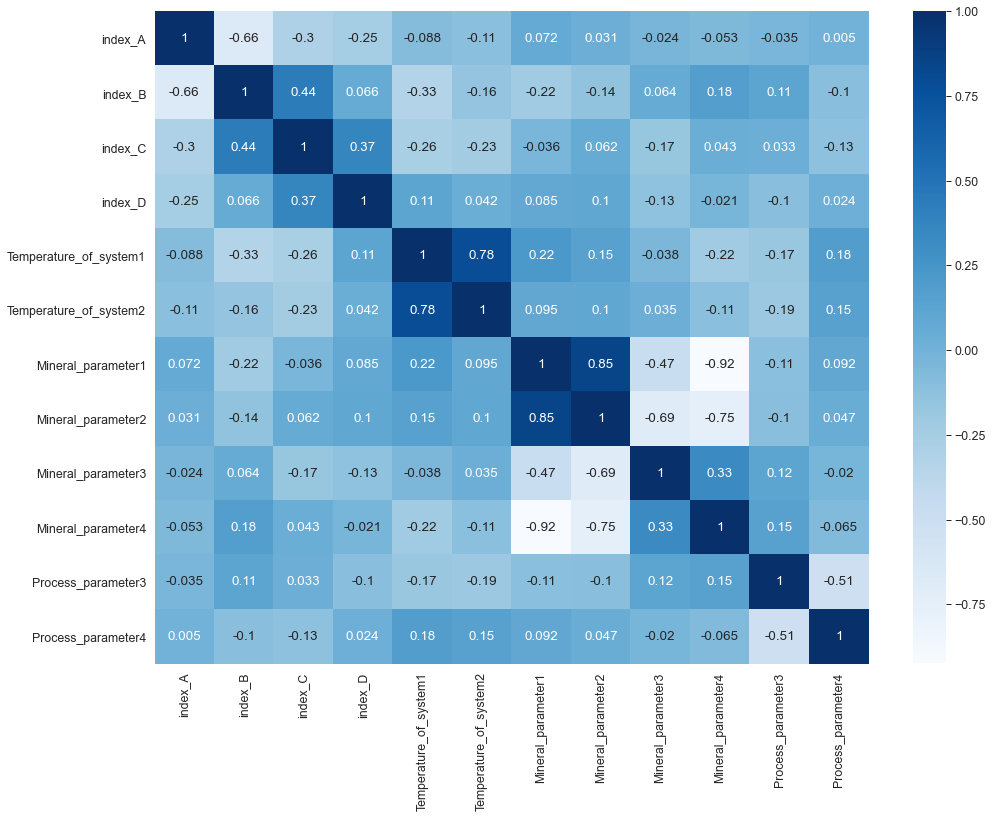

In [249]:
import numpy as np
df = pd.DataFrame(date)
corr = df.corr()
plt.figure(figsize=(16,12))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(corr, cmap='Blues', annot=True)

```
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate dataset
X, y = make_regression(n_samples=25000, n_features=3, n_targets=2, random_state=33)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Create the SVR regressor
svr = SVR(epsilon=0.2)

# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)

# Train the regressor
mor = mor.fit(X_train, y_train)

# Generate predictions for testing data
y_pred = mor.predict(X_test)

# Evaluate the regressor
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
```


In [250]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

import xgboost  as xgb

# Generate dataset
# X, y = make_regression(n_samples=25000, n_features=3, n_targets=2, random_state=33)
name_X = ["Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4","Process_parameter3","Process_parameter4"]
name_y = ["index_A","index_B","index_C","index_D"]
# name_X = ["index_A","index_B","index_C","index_D",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
# name_y = ["Temperature_of_system1",	"Temperature_of_system2"]
name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
X = date[name_X]
y = date[name_y]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create the SVR regressor
# svr = SVR(epsilon=0.01,C=1.0,kernel='poly')
# svr = SVR(epsilon=0.2,kernel='rbf')
# svr = RandomForestRegressor(max_depth=2, random_state=0)
# # svr = ExtraTreesRegressor(n_estimators=100, random_state=0)
# other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
# svr = xgb.XGBRegressor(objective='reg:squarederror',**other_params)

# params = {
#     'iterations':330,
#     'learning_rate':0.1,
#     'depth':10,
#     'loss_function':'RMSE'

# }


# svr = CatBoostRegressor(**params)


# Create the Multioutput Regressor
# mor = MultiOutputRegressor(svr)


# svr1 = SVR(epsilon=0.2,kernel='rbf')
other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
svr2 = xgb.XGBRegressor(objective='reg:squarederror',**other_params)
# svr3 = ExtraTreesRegressor(n_estimators=400, random_state=0)
# kernel = DotProduct() + WhiteKernel()
# svr4 = GaussianProcessRegressor(kernel=kernel,random_state=0)
params = {
    'iterations':300,
    'learning_rate':0.1,
    'depth':10,
    'loss_function':'RMSE'

}


svr4 = CatBoostRegressor(**params)

# models = list()
# models.append(('xg', MultiOutputRegressor(svr2)))
# models.append(('svr', MultiOutputRegressor(svr1)))
# models.append(('RFR', MultiOutputRegressor(svr3)))

models = list()
models.append(('xg', svr2))
# models.append(('svr', svr1))
# models.append(('RFR', svr3))
models.append(('CATBOOST', svr4))
    # define the voting ensemble
svr = VotingRegressor(estimators=models)

mor = MultiOutputRegressor(svr)


# # Train the regressor
mor = mor.fit(X_train, y_train)




0:	learn: 0.9027724	total: 15.4ms	remaining: 4.6s
1:	learn: 0.8857041	total: 30.5ms	remaining: 4.54s
2:	learn: 0.8707392	total: 46.3ms	remaining: 4.58s
3:	learn: 0.8559111	total: 61.1ms	remaining: 4.52s
4:	learn: 0.8394876	total: 75.8ms	remaining: 4.47s
5:	learn: 0.8263451	total: 90.4ms	remaining: 4.43s
6:	learn: 0.8156749	total: 106ms	remaining: 4.42s
7:	learn: 0.8066221	total: 120ms	remaining: 4.39s
8:	learn: 0.7957522	total: 138ms	remaining: 4.45s
9:	learn: 0.7794513	total: 157ms	remaining: 4.54s
10:	learn: 0.7689725	total: 190ms	remaining: 4.98s
11:	learn: 0.7583217	total: 224ms	remaining: 5.38s
12:	learn: 0.7469247	total: 260ms	remaining: 5.74s
13:	learn: 0.7363856	total: 297ms	remaining: 6.06s
14:	learn: 0.7295647	total: 333ms	remaining: 6.32s
15:	learn: 0.7178457	total: 370ms	remaining: 6.57s
16:	learn: 0.7097848	total: 404ms	remaining: 6.73s
17:	learn: 0.7018915	total: 439ms	remaining: 6.87s
18:	learn: 0.6946985	total: 474ms	remaining: 7.01s
19:	learn: 0.6868309	total: 509ms	re

In [251]:
# Generate predictions for testing data
y_pred = mor.predict(X_test)
# Evaluate the regressor
y_test = y_test.values
# y_test
mse1 = mean_squared_error(y_test[:,0], y_pred[:,0])
mse2 = mean_squared_error(y_test[:,1], y_pred[:,1])
mse3 = mean_squared_error(y_test[:,2], y_pred[:,2])
mse4 = mean_squared_error(y_test[:,3], y_pred[:,3])
# print(f'MSE for first regressor: {mse_one} -second regressor: {mse_two}')
print("MSE:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

mse1 = mean_absolute_error(y_test[:,0], y_pred[:,0])
mse2 = mean_absolute_error(y_test[:,1], y_pred[:,1])
mse3 = mean_absolute_error(y_test[:,2], y_pred[:,2])
mse4 = mean_absolute_error(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("MAE:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

mse1 = explained_variance_score(y_test[:,0], y_pred[:,0])
mse2 = explained_variance_score(y_test[:,1], y_pred[:,1])
mse3 = explained_variance_score(y_test[:,2], y_pred[:,2])
mse4 = explained_variance_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("可解释的方差分数:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))


mse1 = r2_score(y_test[:,0], y_pred[:,0])
mse2 = r2_score(y_test[:,1], y_pred[:,1])
mse3 = r2_score(y_test[:,2], y_pred[:,2])
mse4 = r2_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("r2_score:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

mse1 = mean_absolute_percentage_error(y_test[:,0], y_pred[:,0])
mse2 = mean_absolute_percentage_error(y_test[:,1], y_pred[:,1])
mse3 = mean_absolute_percentage_error(y_test[:,2], y_pred[:,2])
mse4 = mean_absolute_percentage_error(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("mean_absolute_percentage_error:")
print("1  " + str(mse1))
print("2  " + str(mse2))
print("3  " + str(mse3))
print("4  " + str(mse4))

MSE:
1  0.4723346929506919
2  0.8289606288947904
3  0.28831513595446234
4  2.0489838374249176
MAE:
1  0.5055064155858265
2  0.6568059898649369
3  0.4135665874203815
4  0.9580151293228684
可解释的方差分数:
1  0.4778962771998032
2  0.5393486523104958
3  0.8121783178100314
4  0.8039681153773822
r2_score:
1  0.4700354613730384
2  0.5362651784982123
3  0.8108728729727801
4  0.803788072638778
mean_absolute_percentage_error:
1  0.006383776911476698
2  0.027776726419015237
3  0.037487449788125876
4  0.06517875501938798


In [252]:
y_pred

array([[79.10238439, 23.53131854, 10.84906526, 11.81289273],
       [78.15687691, 24.28452319, 11.13914712, 22.52460576],
       [78.89772924, 24.46402818, 11.14143577, 12.67375379],
       ...,
       [79.18291998, 24.65843098, 10.50359605, 15.70681486],
       [79.01325949, 23.00443084,  8.56137563, 11.08651401],
       [78.7674884 , 25.45722689, 11.1482952 , 14.59279145]])

In [253]:
pr = pd.read_excel("preid.xlsx")
pr

,Time,index_A,index_B,index_C,index_D,Temperature_of_system1,Temperature_of_system2,Mineral_parameter1,Mineral_parameter2,Mineral_parameter3,Mineral_parameter4,Process_parameter1,Process_parameter2,Process_parameter3,Process_parameter4
0,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,319.02,151.29
1,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,333.77,145.94
2,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,331.19,138.85
3,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,307.62,136.84
4,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,292.61,152.06
5,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,315.84,133.83
6,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,324.77,132.33
7,2022-02-08,NaN,NaN,NaN,NaN,341.40,665.04,52.88,91.27,47.22,22.26,1.25,3.09,300.09,137.59
8,2022-02-09,NaN,NaN,NaN,NaN,1010.32,874.47,54.44,92.12,48.85,21.83,1.25,3.09,315.21,138.35
9,2022-02-09,NaN,NaN,NaN,NaN,1010.32,874.47,54.44,92.12,48.85,21.83,1.25,3.09,305.73,145.17


In [254]:
pt_val = mor.predict(pr[name_X])
pt_val

array([[79.47439711, 24.27770824, 11.71189039, 15.03433334],
       [79.22777676, 24.66348463, 11.54171116, 14.4551339 ],
       [78.95797952, 24.76847917, 11.61367525, 15.92299974],
       [79.12681098, 24.0363533 , 11.45236372, 16.96087889],
       [79.72956477, 24.28899566, 11.39415784, 15.45609367],
       [78.88882351, 24.04703547, 11.81438415, 17.70026795],
       [78.83036817, 24.74563454, 11.80285874, 17.83484488],
       [79.2012836 , 23.91116521, 11.40659266, 16.39372428],
       [78.98294226, 24.41137266, 11.82464274, 15.41203913],
       [79.11967191, 24.29373734, 11.69533041, 14.93372384],
       [78.80457089, 24.49413731, 11.31602636, 14.74050283],
       [79.30815878, 24.19679527, 11.54582875, 14.22787834],
       [79.13364343, 24.01063086, 11.4344021 , 13.84025854],
       [79.2129765 , 24.26539687, 11.57100003, 14.7542066 ],
       [78.9194657 , 24.33188684, 11.49379293, 15.40727007],
       [78.9661081 , 24.07773893, 11.52274753, 15.92187465]])

In [255]:
### 开始对抗
Virtual_val = mor.predict(X)
Virtual_val


array([[78.52907443, 23.53389076, 12.16676367, 17.90383046],
       [78.70487837, 23.5807542 , 12.32632263, 17.94183124],
       [78.83500266, 23.59347112, 12.3357402 , 17.94183124],
       ...,
       [79.18569753, 25.33627021, 11.2817251 , 11.98531295],
       [79.18569753, 25.33627021, 11.2817251 , 11.98531295],
       [79.20981635, 24.80135755, 11.12085537, 12.09515475]])

In [256]:
# 构建一个分类模型吧 A,B,C,D -> 0/1
# 这里做逻辑吧
df = pd.DataFrame(Virtual_val)
# df.to_excel("Virtual_val.xlsx")
df.columns = ['A','B','C','D']
df.to_excel("Virtual_val.xlsx")
ral = pd.read_excel("./gan.xlsx")
ral = pd.DataFrame(ral)
ral


,A,B,C,D,is_qualified
0,78.31,23.66,12.24,17.81,0
1,78.46,23.88,12.41,17.99,0
2,79.08,23.52,12.41,17.86,0
3,79.29,22.94,11.72,17.86,0
4,79.95,21.42,10.68,17.63,0
...,...,...,...,...,...
1648,79.82,23.84,11.03,13.52,1
1649,78.98,25.36,11.37,12.85,0
1650,78.86,25.40,11.37,11.42,0
1651,79.10,25.58,11.37,11.55,0


In [257]:
gan_data = df
df["is_qualified"] = ral["is_qualified"]
df = pd.DataFrame(df)
df

,A,B,C,D,is_qualified
0,78.529074,23.533891,12.166764,17.903830,0
1,78.704878,23.580754,12.326323,17.941831,0
2,78.835003,23.593471,12.335740,17.941831,0
3,79.749106,22.076600,10.877720,17.209333,0
4,79.762681,21.951956,10.863350,17.222794,0
...,...,...,...,...,...
1648,79.526425,24.175692,11.102574,13.345164,1
1649,79.340402,24.673273,11.206851,13.223382,0
1650,79.185698,25.336270,11.281725,11.985313,0
1651,79.185698,25.336270,11.281725,11.985313,0


In [258]:
# 拼接
gan_data = pd.concat([df,ral])
gan_data

,A,B,C,D,is_qualified
0,78.529074,23.533891,12.166764,17.903830,0
1,78.704878,23.580754,12.326323,17.941831,0
2,78.835003,23.593471,12.335740,17.941831,0
3,79.749106,22.076600,10.877720,17.209333,0
4,79.762681,21.951956,10.863350,17.222794,0
...,...,...,...,...,...
1648,79.820000,23.840000,11.030000,13.520000,1
1649,78.980000,25.360000,11.370000,12.850000,0
1650,78.860000,25.400000,11.370000,11.420000,0
1651,79.100000,25.580000,11.370000,11.550000,0


In [276]:
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

name_X1 = ['A','B','C','D']
name_y1 = "is_qualified"
# name_X = ["index_A","index_B","index_C","index_D",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
# name_y = ["Temperature_of_system1",	"Temperature_of_system2"]
# name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
X1 = gan_data[name_X1]
y1 = gan_data[name_y1]
X1 = X1.values
y1 = y1.values

# Train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=35)

# clf = RandomForestClassifier(n_estimators=10)
# clf = GaussianNB()
# clf = SVC()
# clf = AdaBoostClassifier(n_estimators=100, random_state=0)
# clf.fit(X_train1, y_train1)

# categorical_features_indices = np.where(X_train1.dtypes != np.float)[0]
clf = CatBoostClassifier(iterations=100, 
                           depth=15,
                           learning_rate=0.01,
                           loss_function='MultiClass',
                           logging_level='Verbose')
clf.fit(X_train1,y_train1,eval_set=(X_test1, y_test1),plot=True)


# Generate predictions for testing data
y_pred1 = clf.predict(X_test1)
# y_test1 = y_test1.values
# Evaluate the regressor
y_pred1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6869115	test: 0.6872658	best: 0.6872658 (0)	total: 1.97s	remaining: 3m 15s
1:	learn: 0.6809767	test: 0.6816941	best: 0.6816941 (1)	total: 3.55s	remaining: 2m 54s
2:	learn: 0.6753148	test: 0.6765647	best: 0.6765647 (2)	total: 5.3s	remaining: 2m 51s
3:	learn: 0.6692505	test: 0.6710677	best: 0.6710677 (3)	total: 6.69s	remaining: 2m 40s
4:	learn: 0.6633071	test: 0.6654666	best: 0.6654666 (4)	total: 7.91s	remaining: 2m 30s
5:	learn: 0.6575462	test: 0.6601447	best: 0.6601447 (5)	total: 9.42s	remaining: 2m 27s
6:	learn: 0.6522680	test: 0.6552635	best: 0.6552635 (6)	total: 10.6s	remaining: 2m 20s
7:	learn: 0.6464293	test: 0.6498304	best: 0.6498304 (7)	total: 11.8s	remaining: 2m 15s
8:	learn: 0.6410022	test: 0.6447897	best: 0.6447897 (8)	total: 13.2s	remaining: 2m 13s
9:	learn: 0.6354787	test: 0.6396832	best: 0.6396832 (9)	total: 14.4s	remaining: 2m 9s
10:	learn: 0.6304396	test: 0.6350947	best: 0.6350947 (10)	total: 15.6s	remaining: 2m 6s
11:	learn: 0.6252064	test: 0.6302481	best: 0

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [277]:
from sklearn.metrics import average_precision_score


# y_test
mse1 = balanced_accuracy_score(y_test1, y_pred1)
# print(f'MSE for first regressor: {mse_one} -second regressor: {mse_two}')
print("平衡精度:")
print("1  " + str(mse1))

mse1 = confusion_matrix(y_test1, y_pred1)
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("混淆矩阵:")
print("1  " + str(mse1))

mse1 = average_precision_score(y_test1, y_pred1)

# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("根据预测分数计算平均精度:")
print("1  " + str(mse1))



# precision, recall, thresholds = zero_one_loss(y_test1, y_pred1)

# # print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
# print("0-1精度损失:")
# print("precision")
# print(precision)
# print("recall")
# print(recall)
# print("thresholds")
# print(thresholds)


mse1 = accuracy_score(y_test1, y_pred1)

# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("精度分类得分。:")
print("1  " + str(mse1))

平衡精度:
1  0.9178974351684696
混淆矩阵:
1  [[646  37]
 [ 34 275]]
根据预测分数计算平均精度:
1  0.818700797149748
精度分类得分。:
1  0.9284274193548387


In [278]:
y_pred_val = pd.DataFrame(pt_val)
y_pred_val.columns = ['A','B','C','D']
y_pred_val

,A,B,C,D
0,79.474397,24.277708,11.711890,15.034333
1,79.227777,24.663485,11.541711,14.455134
2,78.957980,24.768479,11.613675,15.923000
3,79.126811,24.036353,11.452364,16.960879
4,79.729565,24.288996,11.394158,15.456094
5,78.888824,24.047035,11.814384,17.700268
6,78.830368,24.745635,11.802859,17.834845
7,79.201284,23.911165,11.406593,16.393724
8,78.982942,24.411373,11.824643,15.412039
9,79.119672,24.293737,11.695330,14.933724


In [279]:
result = clf.predict(y_pred_val)
result

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=int64)